In [4]:
import pandas as pd
df=pd.read_csv("used_cars.csv")
# ***Head***
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [6]:
df.columns


Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
df.describe()


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [8]:
df.shape

(4009, 12)

In [9]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [11]:
df['price'].dtype
df['price'].describe()

,price
count,4009
unique,1569
top,"$15,000"
freq,39


In [20]:
target = 'model_year'
print(f"\nTarget variable: {target}")


Target variable: model_year


In [21]:
if df[target].nunique() > 2016:
 print("The target variable is continuous.")
else:
 print("The target variable is discrete.")

The target variable is discrete.


In [24]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])
        else:
            df.loc[:, col] = df[col].fillna(df[col].mean())

print("\nNull values after imputation:")
print(df.isnull().sum())


Null values after imputation:
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


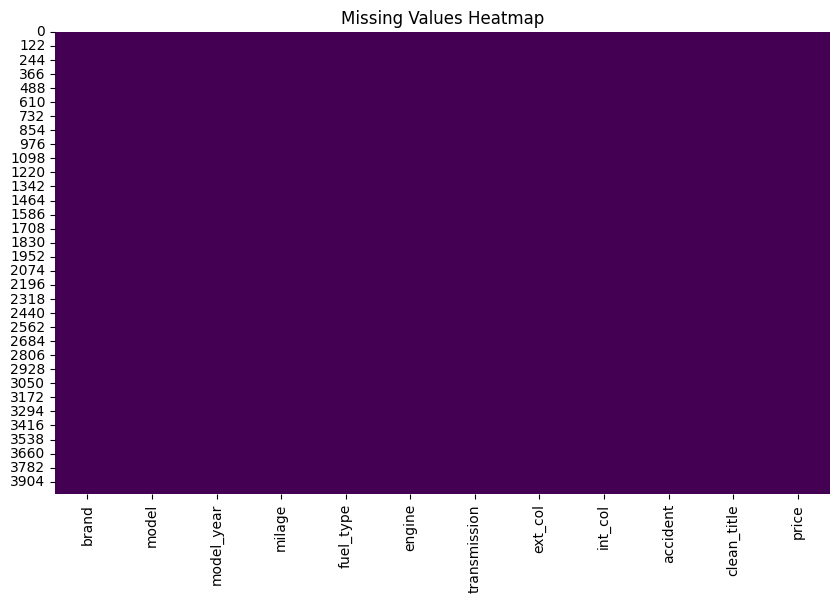

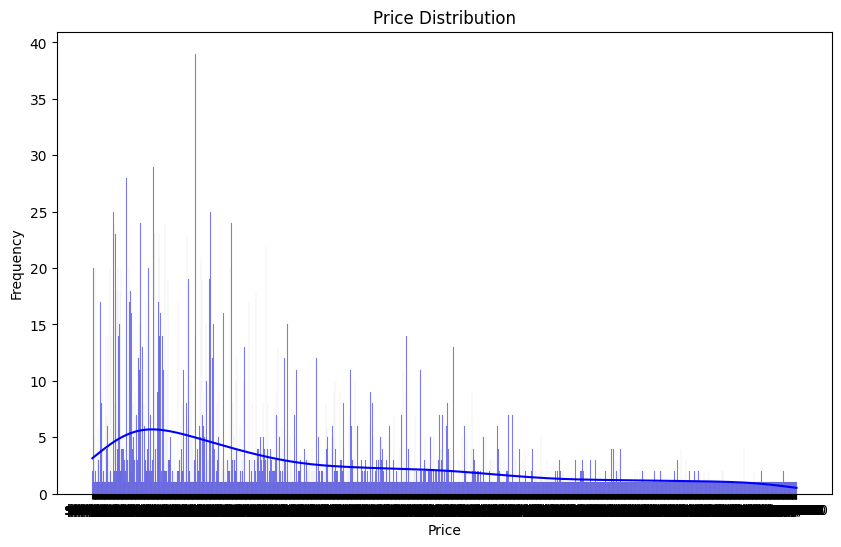

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the Null Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
# Visualizing the Distribution of 'Price' (Target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()